In [1]:
#import cv2
import numpy as np
from tensorflow.keras.models import Model, load_model
import tensorflow as tf
from tensorflow import keras
#from IPython.display import Image, display
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
#from PIL import Image
import sys
sys.path.append('QXP/')
from ScoreCAM_QXP import ScoreCAM_QXP

In [2]:
print(tf.keras.__version__)
print(tf.__version__)
print(np.__version__)
print(sys.version)

2.4.0
2.4.1
1.19.5
3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


In [3]:
tf.keras.backend.clear_session()
model = InceptionV3(weights='imagenet', include_top=True)

In [4]:
#model.summary()

In [5]:
import urllib.request

# Download the ImageNet class labels file
url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
filename = 'imagenet_classes.txt'
urllib.request.urlretrieve(url, filename)

# Load the class labels from the file
with open(filename, 'r') as f:
    labels = f.read().splitlines()

# Print the class labels
#print(labels)




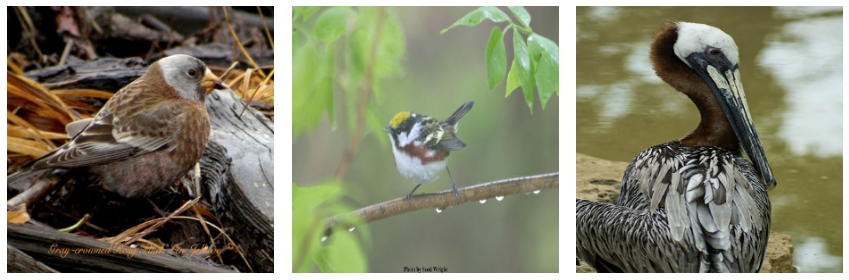

(3, 299, 299, 3)


In [6]:

#ds_train, ds_test = tfds.load('stanford_dogs', split=['test', 'train'], shuffle_files=True, as_supervised=True)

import tensorflow_datasets as tfds
ds_train, ds_test = tfds.load('caltech_birds2011', split=['test', 'train'], shuffle_files=True, as_supervised=True)

def resize(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, (299, 299))
    return image, label

ds_test = ds_test.map(resize)

img1, img2, img3 = tfds.as_numpy(ds_test.take(3))

# Loading sample images
image1 = img1[0]
image2 = img2[0]
image3 = img3[0]

images = np.asarray([np.array(image1), np.array(image2), np.array(image3)])


# Visualizing
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in range(len(images)):
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Preparing
X      = preprocess_input(images*255)
print(X.shape)

In [7]:
predictions = model(X, training=False)
decoded_predictions = decode_predictions(predictions.numpy(), top=3)

# Print the top 3 predictions
for dp in decoded_predictions:
    for _, label, confidence in dp:
        print(f"{label}: {confidence}")
    print('-----------------------')

 



house_finch: 0.4887316823005676
brambling: 0.2857270836830139
red-backed_sandpiper: 0.01945735514163971
-----------------------
junco: 0.1821664273738861
chickadee: 0.17120501399040222
bulbul: 0.09937065094709396
-----------------------
pelican: 0.6650916337966919
black_stork: 0.009951098822057247
spoonbill: 0.00810427125543356
-----------------------


In [11]:
score_1 = labels.index('house finch')
score_2 = labels.index('junco')
score_3 = labels.index('pelican')

In [9]:
qxp = ScoreCAM_QXP(model, penultimate_layer='conv2d_93', threshold=10)

In [12]:
qxp_birds, masked_birds = qxp(X, scores=[score_1, score_2, score_3], quantitative_explanation = True, labels=labels, activation_modifier = True) 

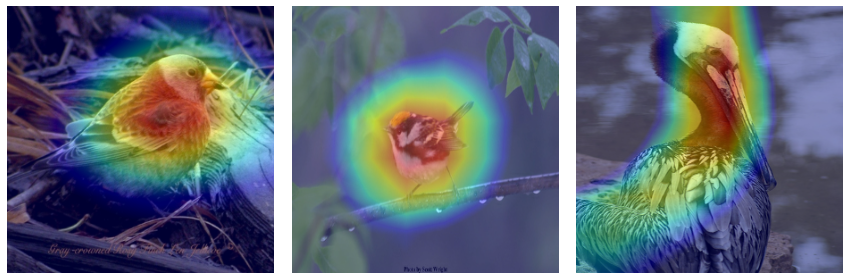

In [13]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in range(len(images)):
    ax[i].imshow(images[i])
    ax[i].imshow(qxp_birds[i], cmap='jet', alpha=0.4)
    ax[i].axis('off')
plt.tight_layout()
plt.show()